# Dimensional Resemblance Analysis (DRA) 

In [13]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from tqdm import tqdm
print('Libraries imported!!')

Libraries imported!!


In [3]:
#define directory of functions and actual directory
HOME_PATH = 'C:/Users/27261/Desktop/prostate/code-0126/' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from dimensional_resemblance import preprocess_data
from dimensional_resemblance import pca_transform
from dimensional_resemblance import isomap_transform_on_batch
from dimensional_resemblance import isomap_transform
from dimensional_resemblance import umap_transform_on_batch   # UMAP (Uniform Manifold Approximation and Projection) 
from dimensional_resemblance import umap_transform
from dimensional_resemblance import dra_distance

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [4]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV-FML','CTGAN','WGANGP']
SYNTHESIZERS = ['Real','GM','SDV-FML','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'Dataset_cedric/Train.csv',
            'GM' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/GM.csv',
            'SDV-FML' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/SDV-FML.csv',
            'CTGAN' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/CTGAN.csv',
            'WGANGP' : HOME_PATH + 'Dataset_cedric/SYNTHETIC DATASETS/WGANGP.csv'}
categorical_columns = ["cT(MRI)","Multifocaal", "pN", "1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)"]
data = dict()

In [5]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
data

{'Real':      eadnr (I)        Age Multifocaal  \
 0     74911959  60.254795           0   
 1     72364086  66.391781           1   
 2     72845225  69.010959           0   
 3     65384463  41.136986           0   
 4     83257287  74.665753           0   
 ..         ...        ...         ...   
 228   77679900  68.350685           0   
 229   70544747  73.531507           0   
 230   88824362  65.734247           0   
 231   61072681  60.189041           0   
 232   89901847  69.282192           1   
 
     1c (0) - Perifeer (1) -  Beide (2) - Transitie (3)  Preoperatief PSA  \
 0                                                    3              1.90   
 1                                                    3              4.02   
 2                                                    1              4.60   
 3                                                    3              5.00   
 4                                                    1             10.90   
 ..                     

## 2. Preprocess variables for data reduction

In [6]:
data_scaled = dict()
for name in DATA_TYPES :
    data_scaled[name] = preprocess_data(data[name])
data_scaled

{'Real': array([[-0.11925364, -0.68431469, -0.59976015, ...,  0.        ,
          0.        ,  0.        ],
        [-0.38823859,  0.25986707, -0.46266609, ...,  0.        ,
          0.        ,  0.        ],
        [-0.33744361,  0.66283035, -0.42515922, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [ 1.34951146,  0.15870474, -0.05655727, ...,  1.        ,
          0.        ,  0.        ],
        [-1.58029877, -0.69443092, -0.02422376, ...,  1.        ,
          0.        ,  0.        ],
        [ 1.46326409,  0.70455982, -0.22469149, ...,  0.        ,
          1.        ,  0.        ]]),
 'GM': array([[-1.54952869, -0.04525446, -0.08139762, ...,  0.        ,
          1.        ,  0.        ],
        [ 0.44993325,  0.99622626, -0.34039147, ...,  0.        ,
          0.        ,  0.        ],
        [ 1.39067265,  0.11845712, -0.16380761, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [ 0.09434151, -0.99886269, -0.26

## 3. Principal Component Analysis (PCA)

In [7]:
pca = dict()
pca['Real'] = pca_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    pca[name] = pca_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
pca

{'Real':           PC1       PC2  Label
 0   -3.871125 -2.427779    1.0
 1   -2.644653 -3.911589    1.0
 2    1.202738 -4.655511    1.0
 3   -2.638779 -0.049708    1.0
 4    6.450352  2.333891    1.0
 ..        ...       ...    ...
 228  1.609312 -3.892603    1.0
 229 -0.844428 -0.774908    1.0
 230  0.437045  0.983882    1.0
 231 -5.976759 -2.822938    1.0
 232 -2.032162  3.051111    1.0
 
 [233 rows x 3 columns],
 'GM':           PC1       PC2  Label
 0    2.010665  1.907859    1.0
 1    0.093171  0.292470    1.0
 2    2.262990 -1.462128    1.0
 3   -1.745026  0.643887    1.0
 4   -2.533444  1.200140    1.0
 ..        ...       ...    ...
 228  0.403284 -1.641168    1.0
 229 -0.270387  1.048930    1.0
 230  1.195772 -6.674828    1.0
 231 -3.258192  0.373069    1.0
 232  3.311130 -4.558068    1.0
 
 [233 rows x 3 columns],
 'SDV-FML':           PC1       PC2  Label
 0    2.839342  2.199495    1.0
 1   -0.702113 -0.228548    1.0
 2   -1.479591  1.109837    1.0
 3    0.343550 -1.150165 

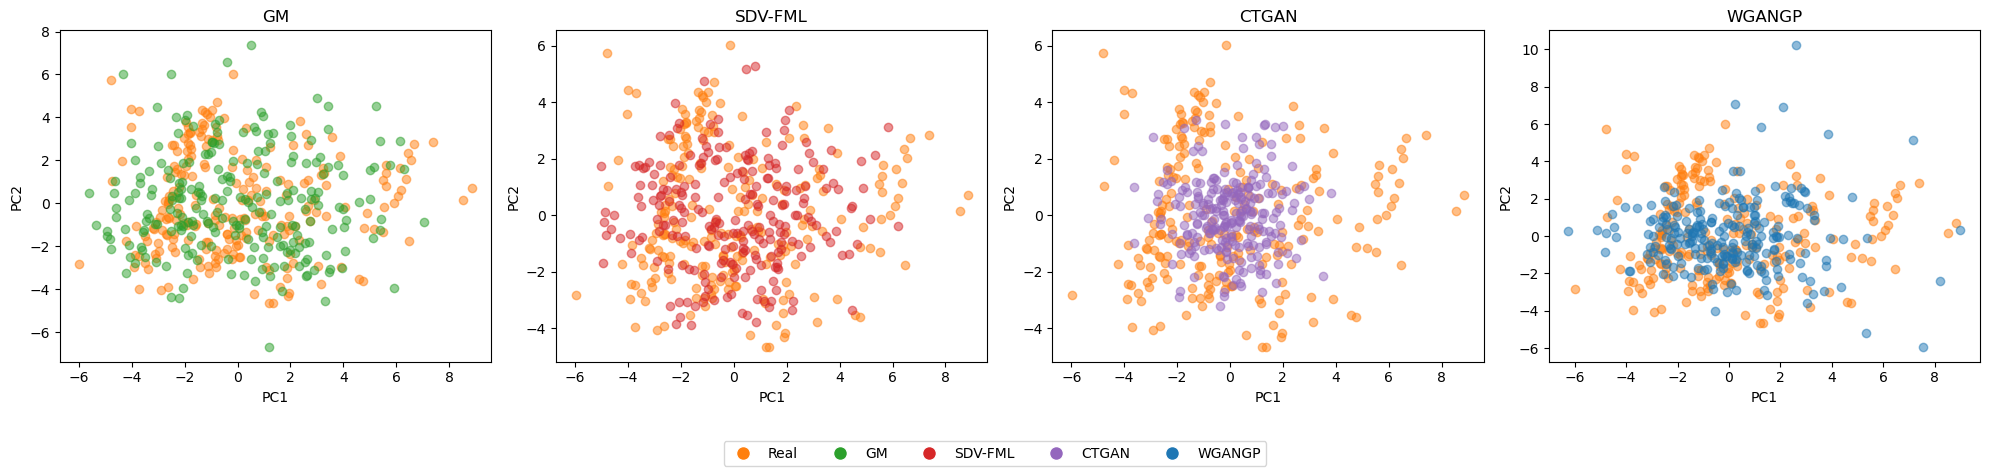

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

colors = {'Real': 'tab:orange', 'GM': 'tab:green', 'SDV-FML': 'tab:red', 'CTGAN': 'tab:purple', 'WGANGP': 'tab:blue'}

fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 

for i, synth_name in enumerate(['GM', 'SDV-FML', 'CTGAN', 'WGANGP']):
    ax = axs[i]
    ax.scatter(pca['Real']['PC1'], pca['Real']['PC2'], c=colors['Real'], label='Real', alpha=0.5)
    ax.scatter(pca[synth_name]['PC1'], pca[synth_name]['PC2'], c=colors[synth_name], label=synth_name, alpha=0.5)
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(synth_name)


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=color, markersize=10) for key, color in colors.items()]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(legend_elements))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()

## 4. ISOMAP

In [11]:
isomap = dict()
#isomap['Real'] = isomap_transform_on_batch(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
isomap['Real'] = isomap_transform(data_scaled['Real'], np.zeros((len(data_scaled['Real']), 1)))
for name in SYNTHESIZERS :
    #isomap[name] = isomap_transform_on_batch(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
    isomap[name] = isomap_transform(data_scaled[name], np.ones((len(data_scaled[name]), 1)))
isomap

{'Real':            PC1        PC2  Label
 0    -8.022393  -9.453568    1.0
 1     2.756602 -10.624770    1.0
 2    11.509439   1.430603    1.0
 3   -13.782764  -3.995966    1.0
 4     6.336819  15.298223    1.0
 ..         ...        ...    ...
 228   8.129518  -0.783355    1.0
 229   0.077979  -2.683482    1.0
 230   6.954427  -5.781628    1.0
 231 -10.480691  -6.284752    1.0
 232  -8.083839  -5.455731    1.0
 
 [233 rows x 3 columns],
 'GM':           PC1        PC2  Label
 0    3.488385   4.778806    1.0
 1    0.481960  -0.250594    1.0
 2    4.855546  -0.882012    1.0
 3   -8.964846  -0.951305    1.0
 4   -6.656900   2.555481    1.0
 ..        ...        ...    ...
 228  4.794544  -0.574068    1.0
 229 -3.574029   4.351946    1.0
 230  0.509401 -13.812668    1.0
 231 -8.217455  -0.607100    1.0
 232  3.039844 -11.750672    1.0
 
 [233 rows x 3 columns],
 'SDV-FML':           PC1        PC2  Label
 0    1.322020  11.142674    1.0
 1    3.990309   4.748493    1.0
 2    7.563523   1

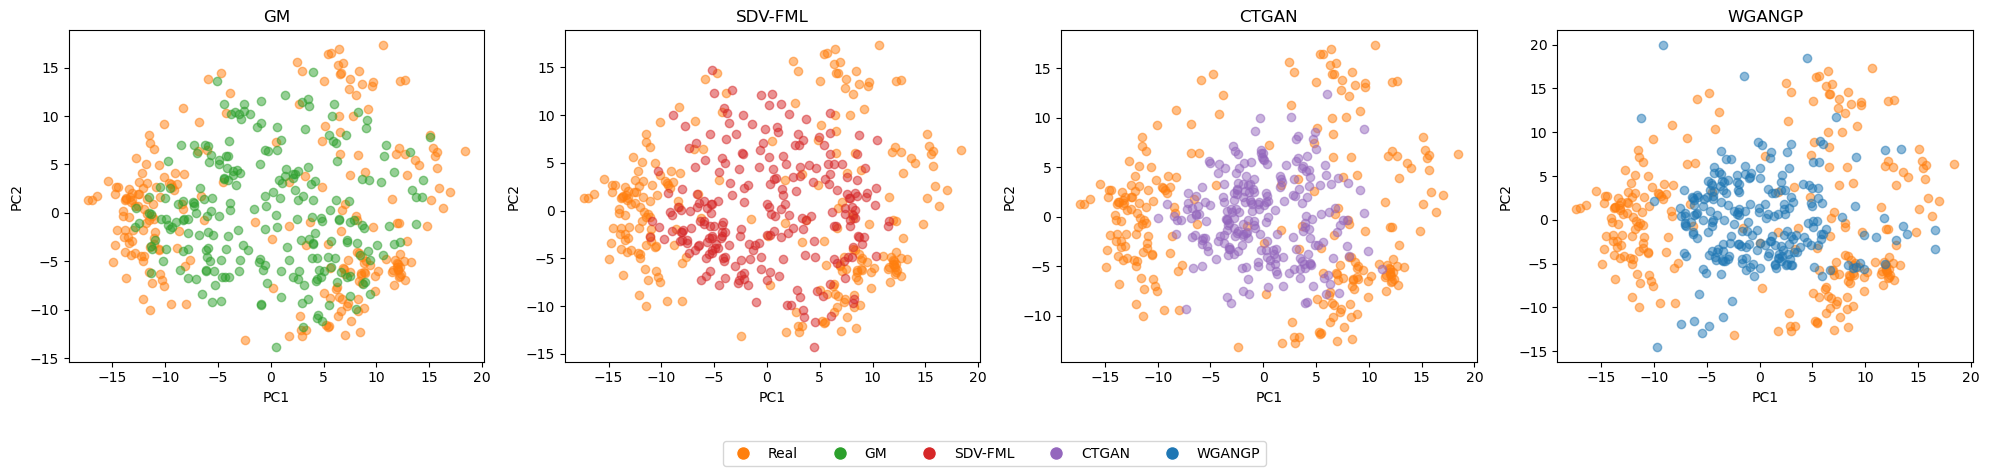

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

colors = {'Real': 'tab:orange', 'GM': 'tab:green', 'SDV-FML': 'tab:red', 'CTGAN': 'tab:purple', 'WGANGP': 'tab:blue'}

fig, axs = plt.subplots(1, 4, figsize=(20, 5)) 

for i, synth_name in enumerate(['GM', 'SDV-FML', 'CTGAN', 'WGANGP']):
    ax = axs[i]
    ax.scatter(isomap['Real']['PC1'], isomap['Real']['PC2'], c=colors['Real'], label='Real', alpha=0.5)
    ax.scatter(isomap[synth_name]['PC1'], isomap[synth_name]['PC2'], c=colors[synth_name], label=synth_name, alpha=0.5)
    
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(synth_name)


legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=key,
                          markerfacecolor=color, markersize=10) for key, color in colors.items()]
fig.legend(handles=legend_elements, loc='lower center', ncol=len(legend_elements))

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.show()